## <h1>Introduction to Data Science - Bank Marketing Project<h1>

    

Team Members:
    
Ophir Shurany ID: 304867716

Amit Shreiber ID: 200867174
.

<h2>1. Load Database<h2>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.close('all')
%matplotlib inline

<h3>1.1.-1.3 Create and load dataframe<h3>

In [33]:
data = pd.read_csv("bank.csv",sep='|',encoding='utf8')
#drop duplicate data
df = data
df = df.drop_duplicates('Unnamed: 0',keep=False)
#drop #rows
df=df.drop('Unnamed: 0',axis=1)
df_copy_original=df #Keep original

<h2>2. Data Exploration<h2>

<h3>2.1. view first 5 rows in df<h3>

In [34]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39.0,admin.,married,university.degree,no,no,no,cellular,jul,mon,...,3.0,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
2,51.0,management,married,university.degree,NaN,no,no,telephone,jun,fri,...,10.0,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,51.0,blue-collar,married,basic.4y,NaN,no,yes,telephone,jun,tue,...,1.0,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,yes
5,53.0,services,married,high.school,NaN,no,no,telephone,may,thu,...,2.0,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
6,40.0,blue-collar,married,basic.6y,no,no,no,cellular,may,tue,...,1.0,11,1,success,-1.8,92.893,-46.2,1.344,5099.1,no


<h3>2.2. Presenting all columns, number of rows and type<h3>

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35370 entries, 0 to 39895
Data columns (total 21 columns):
age               35239 non-null float64
job               35370 non-null object
marital           35303 non-null object
education         33880 non-null object
default           27970 non-null object
housing           34527 non-null object
loan              34527 non-null object
contact           35370 non-null object
month             35370 non-null object
day_of_week       35370 non-null object
duration          35370 non-null int64
campaign          34954 non-null float64
pdays             35370 non-null int64
previous          35370 non-null int64
poutcome          35370 non-null object
emp.var.rate      35370 non-null float64
cons.price.idx    35370 non-null float64
cons.conf.idx     35370 non-null float64
euribor3m         35370 non-null float64
nr.employed       35370 non-null float64
y                 35370 non-null object
dtypes: float64(7), int64(3), object(11)
memory

<h3>2.3. Feature statistics for numerical categories<h3>

In [36]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,35239.000000,35370.000000,34954.000000,35370.000000,35370.000000,35370.000000,35370.000000,35370.000000,35370.000000,35370.000000
mean,40.042879,257.985129,2.572209,963.598728,0.168335,0.097665,93.579768,-40.467928,3.640882,5167.701453
std,10.416313,258.531122,2.767796,184.121868,0.483834,1.564469,0.577052,4.613972,1.726877,71.725021
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.876000,-41.800000,4.857000,5191.000000
75%,47.000000,318.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Histograms for categorial features

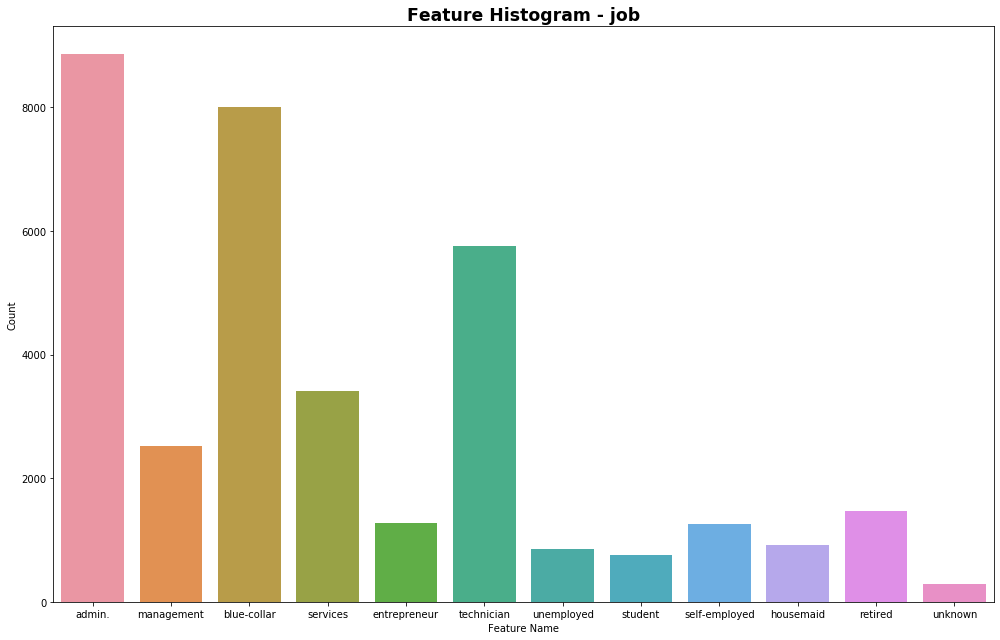

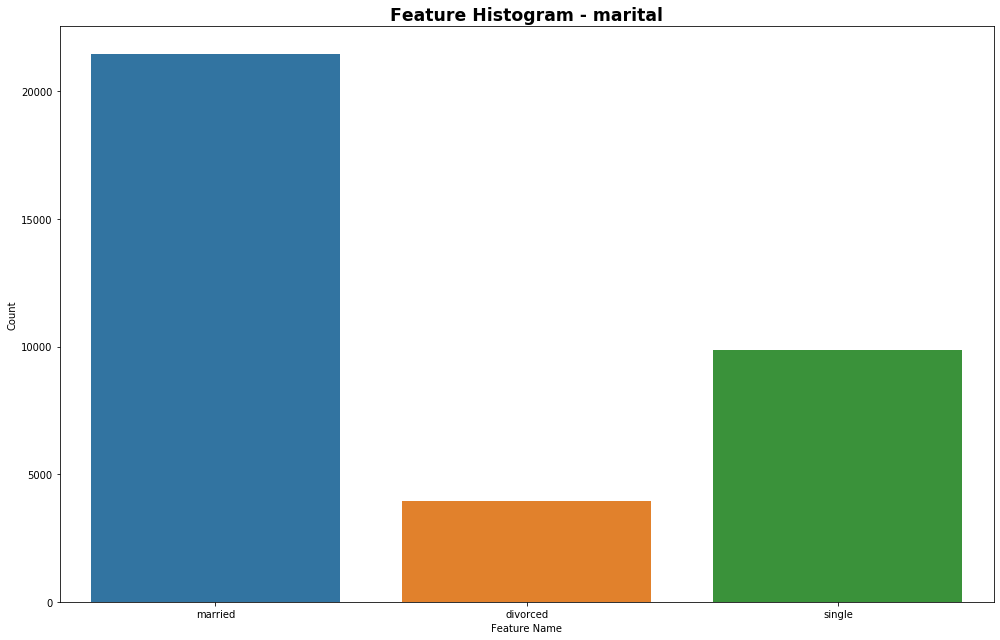

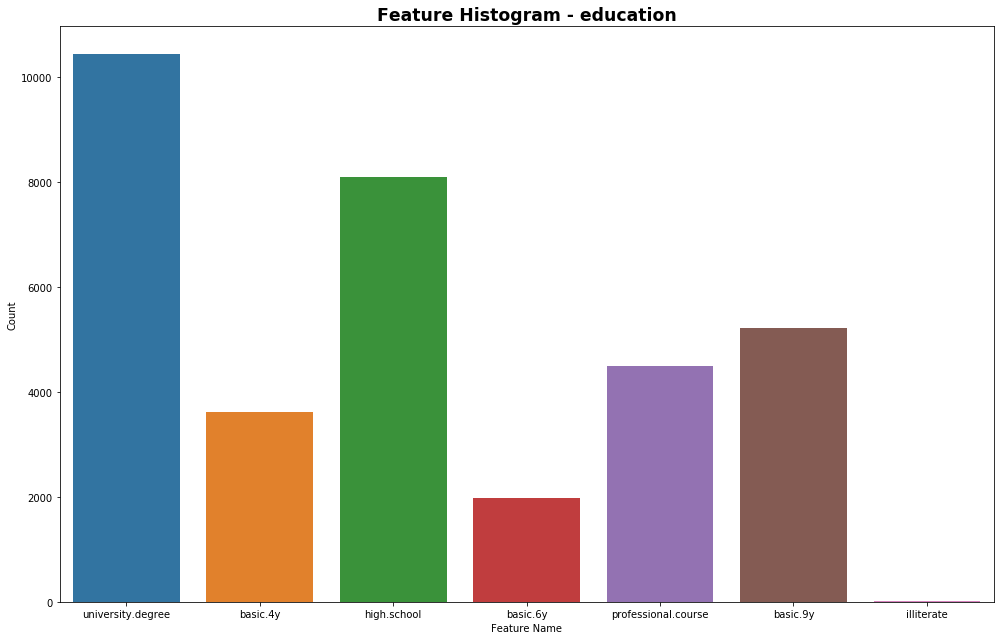

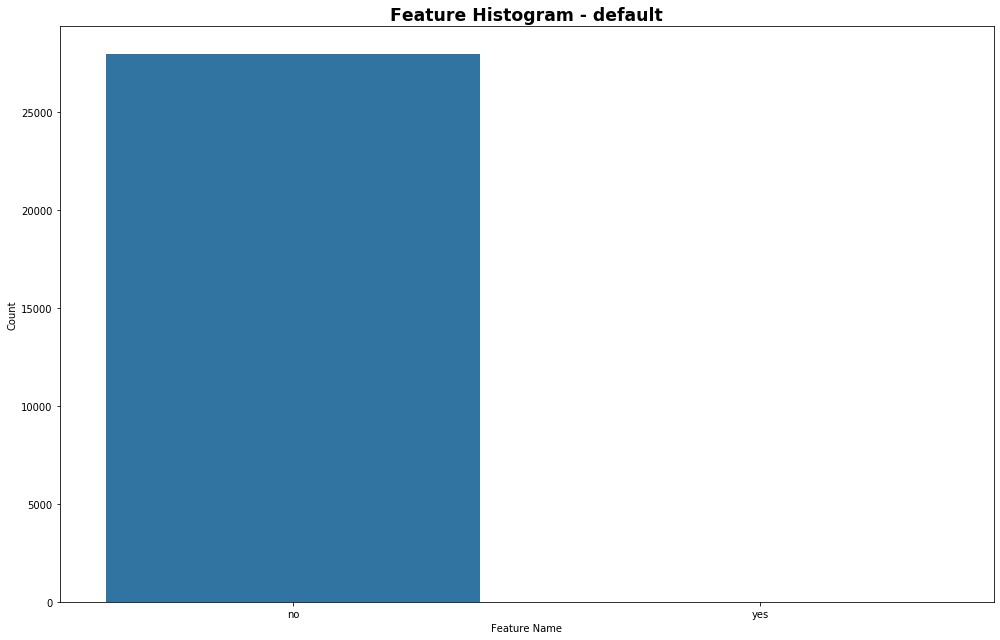

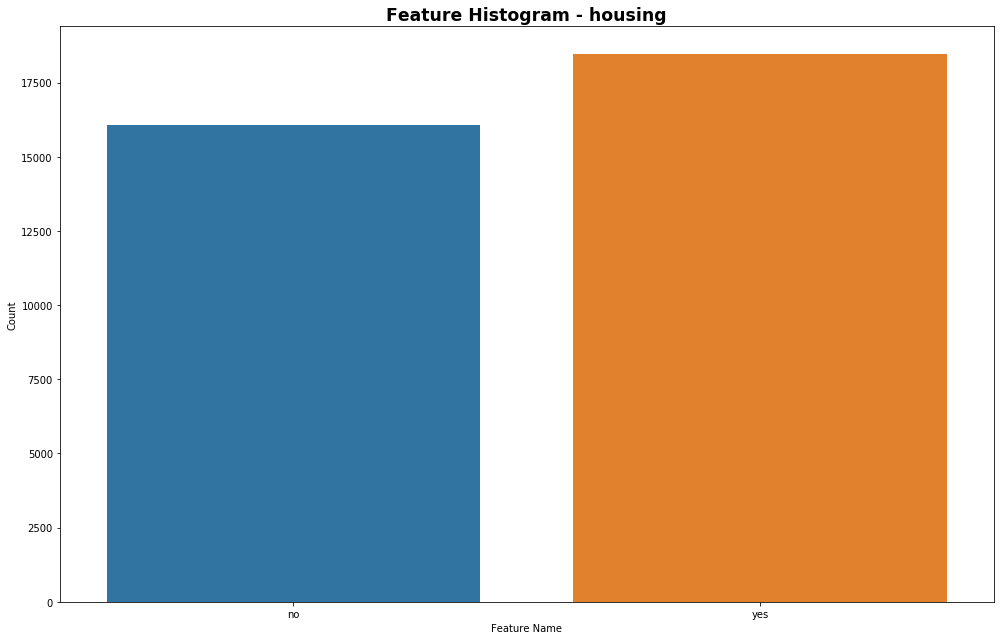

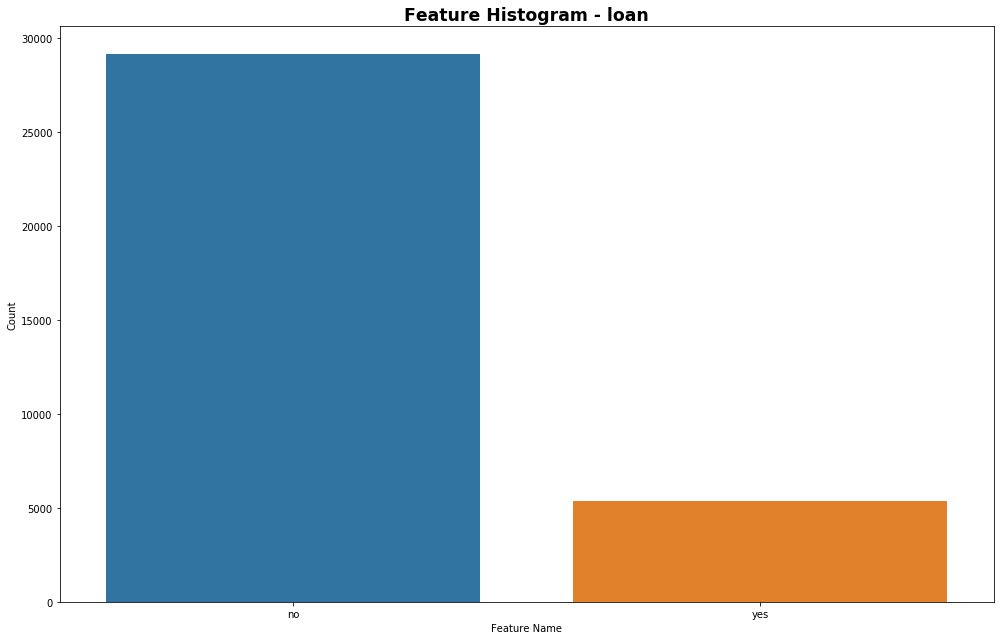

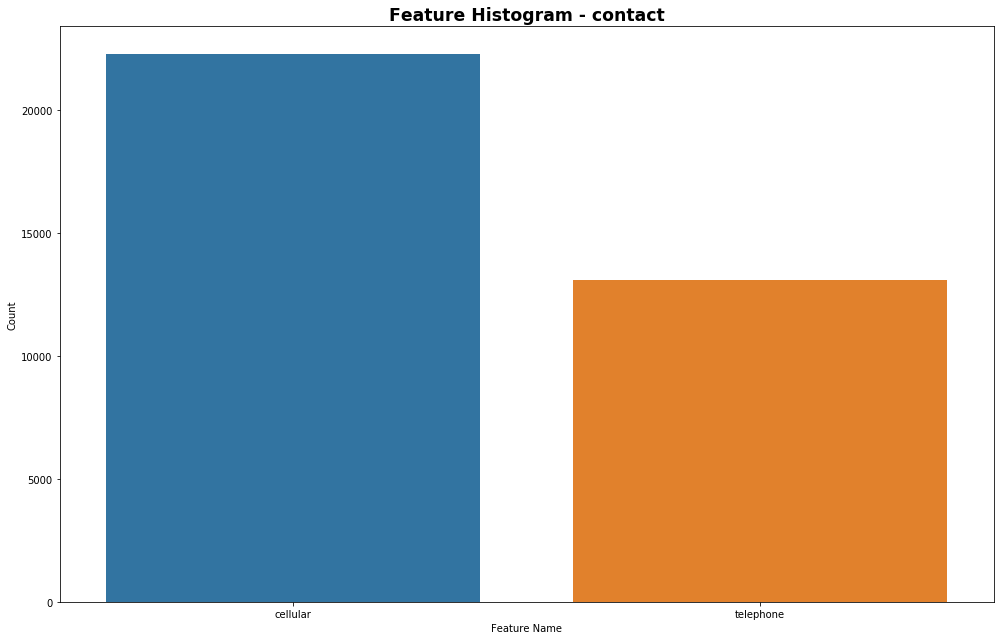

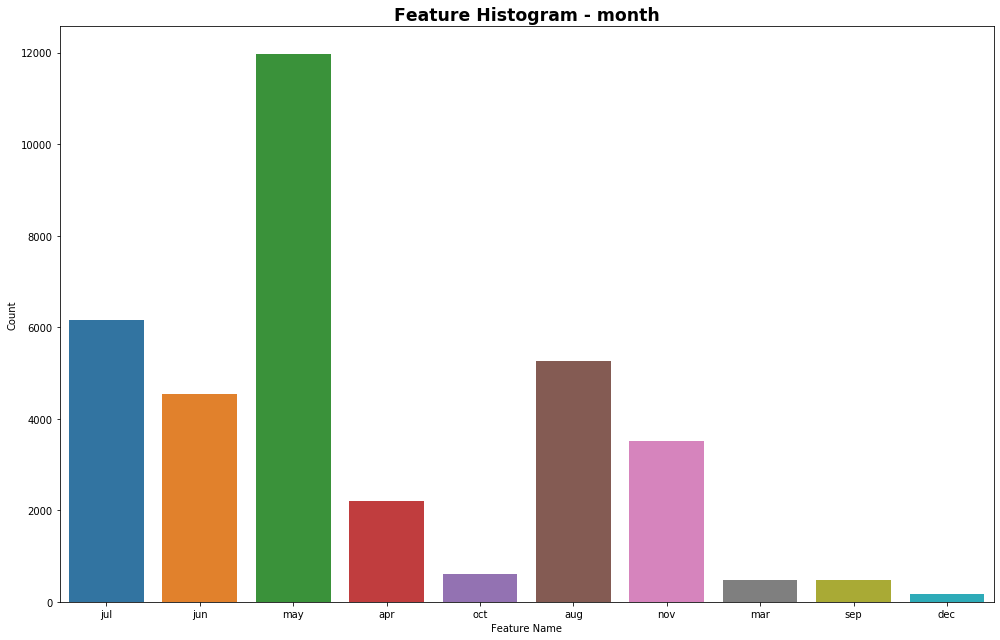

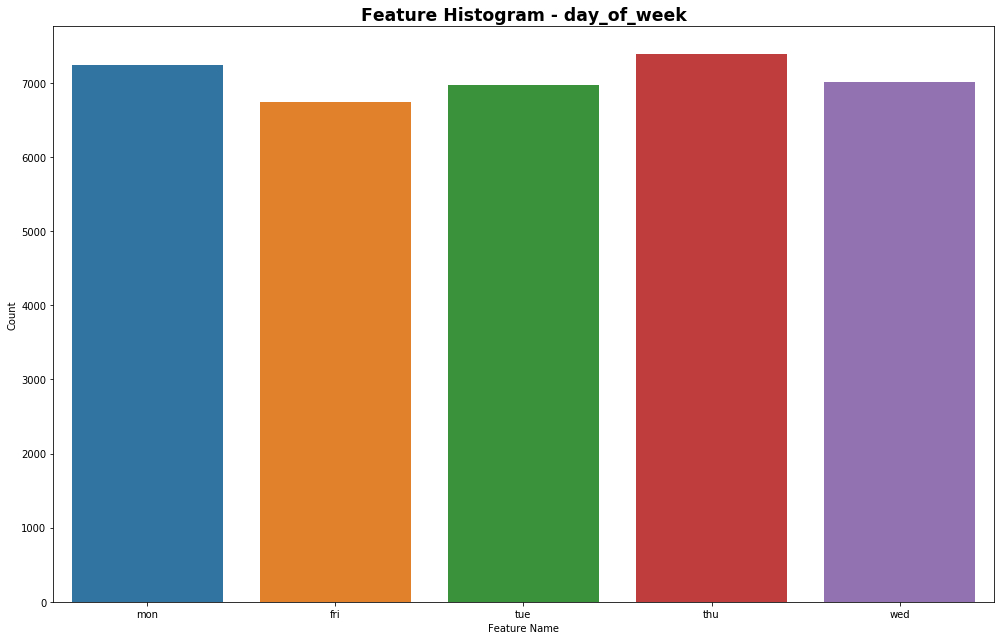

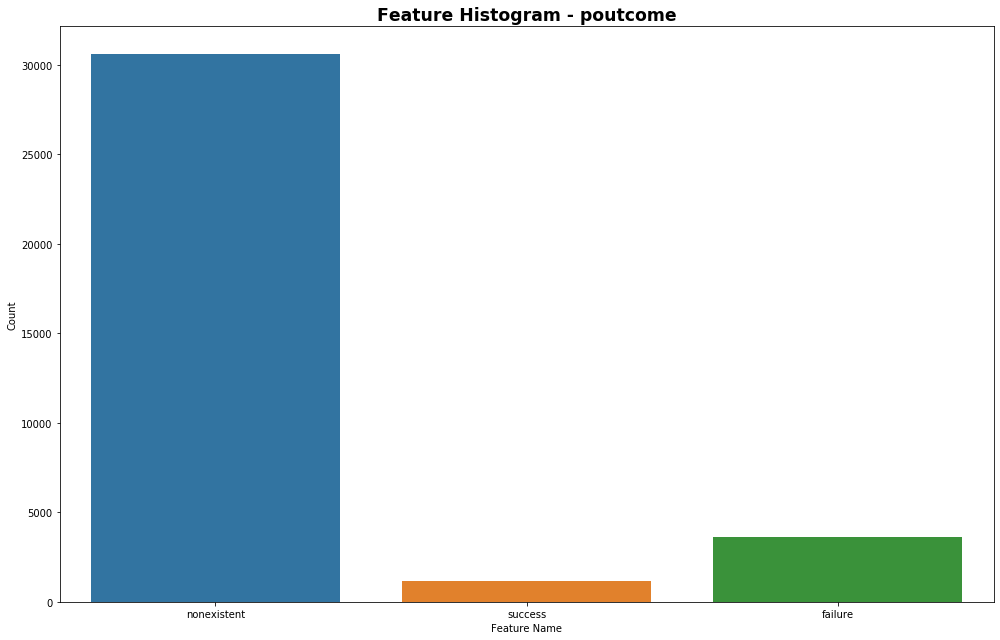

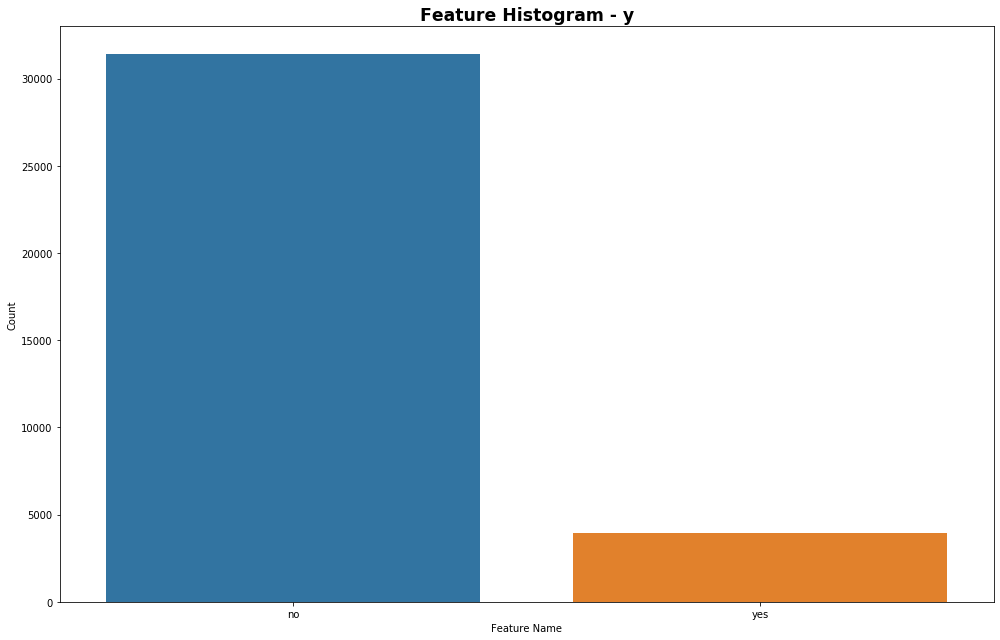

In [37]:
categorcial_variables =list(df.select_dtypes(include="object").columns)
for feature in categorcial_variables:
    plt.figure(figsize=(14, 9))
    sns.countplot(x=feature,data=df)
    plt.title("Feature Histogram - " + feature,fontsize='xx-large', fontweight='bold')
    plt.ylabel("Count")
    plt.xlabel("Feature Name")
    plt.tight_layout()









Histograms for Numeric features

C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


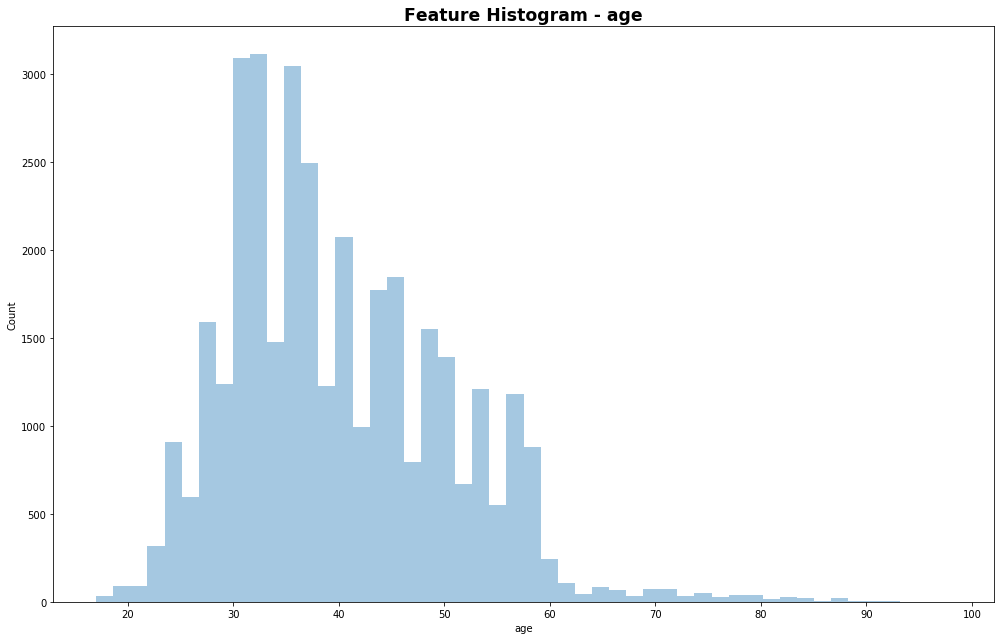

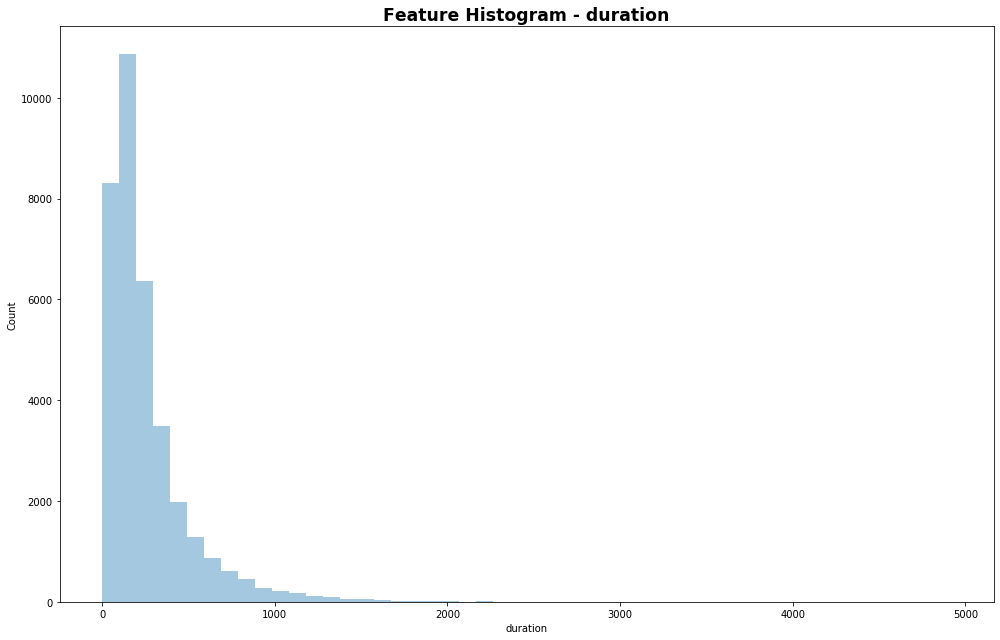

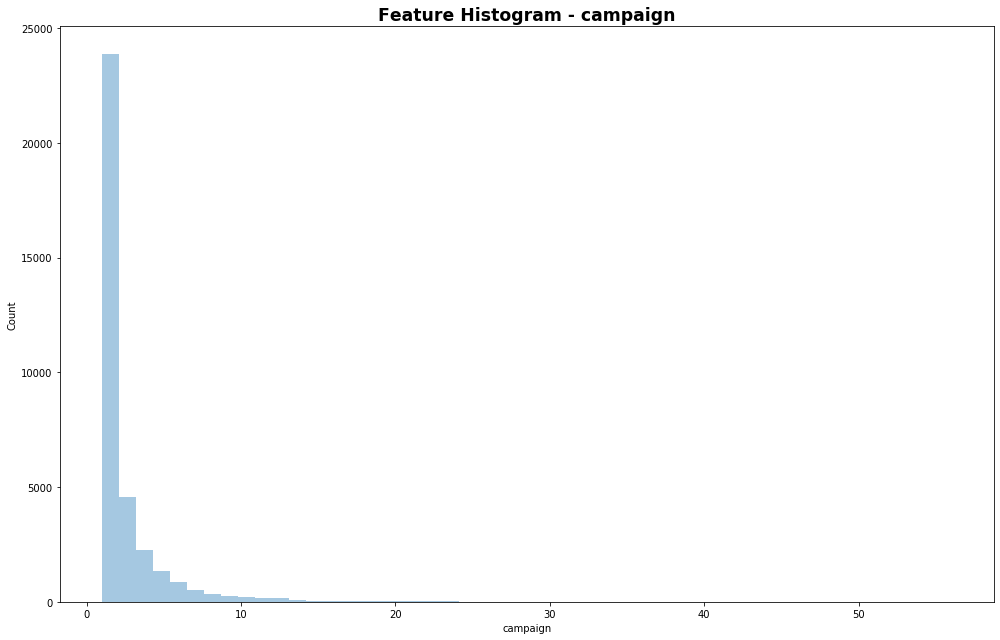

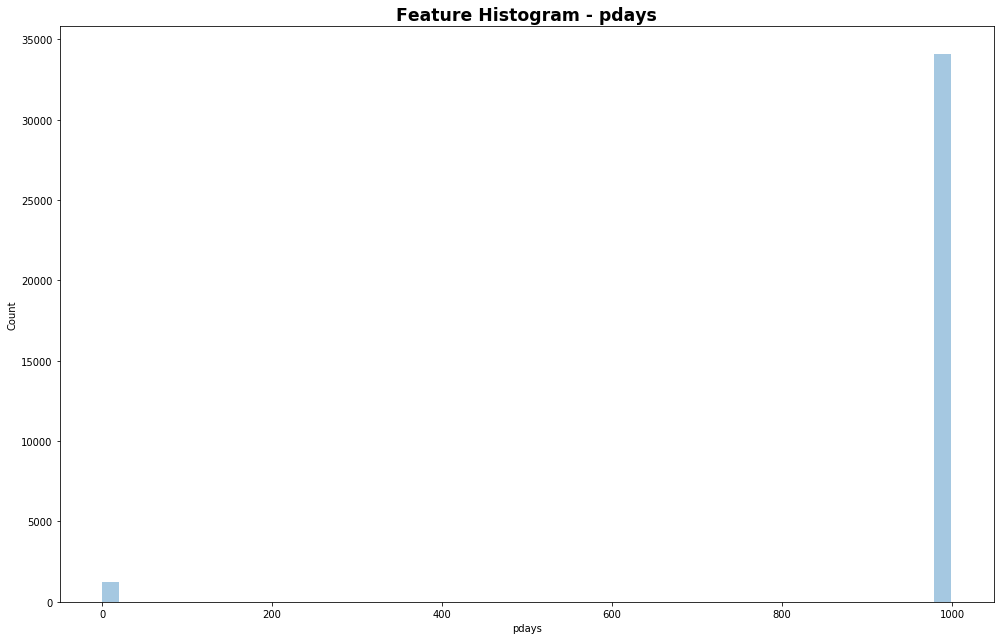

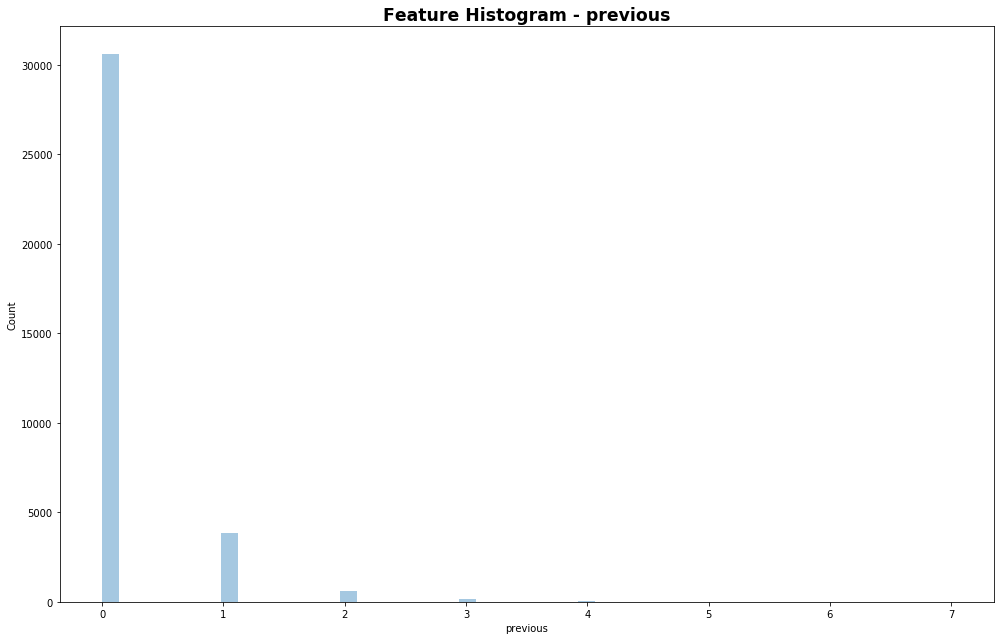

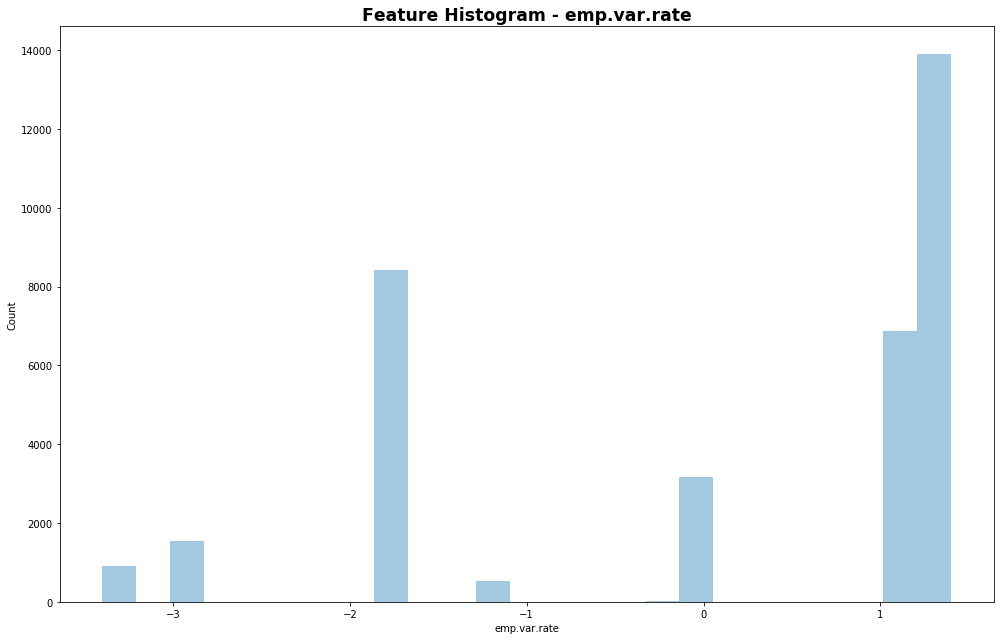

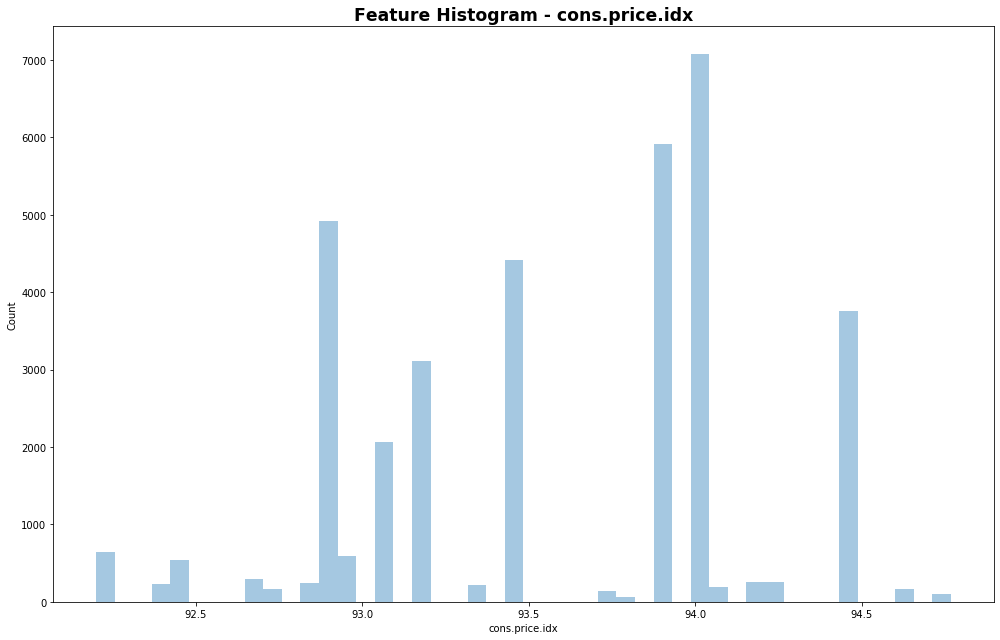

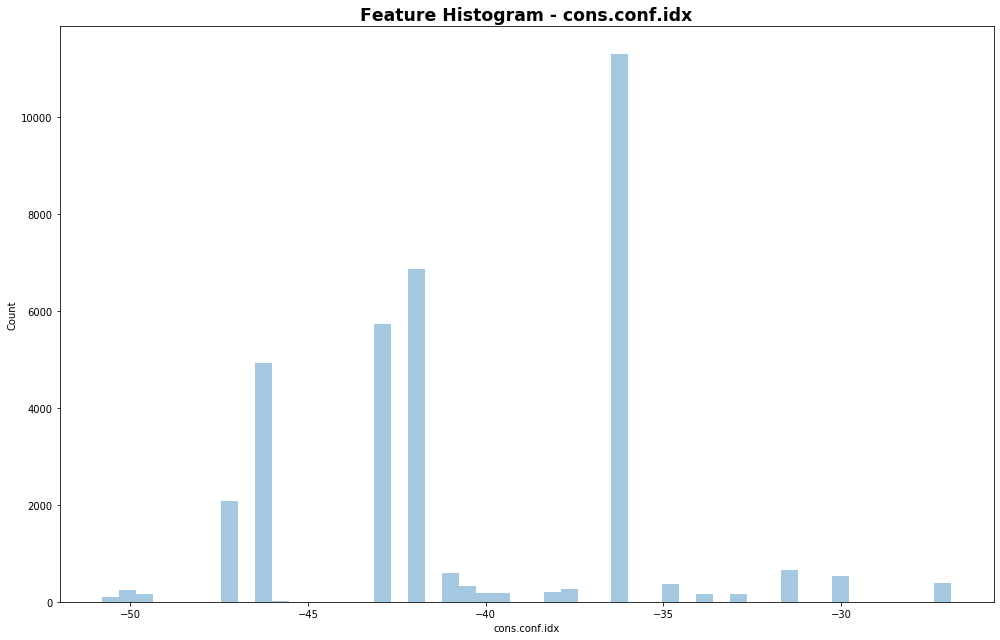

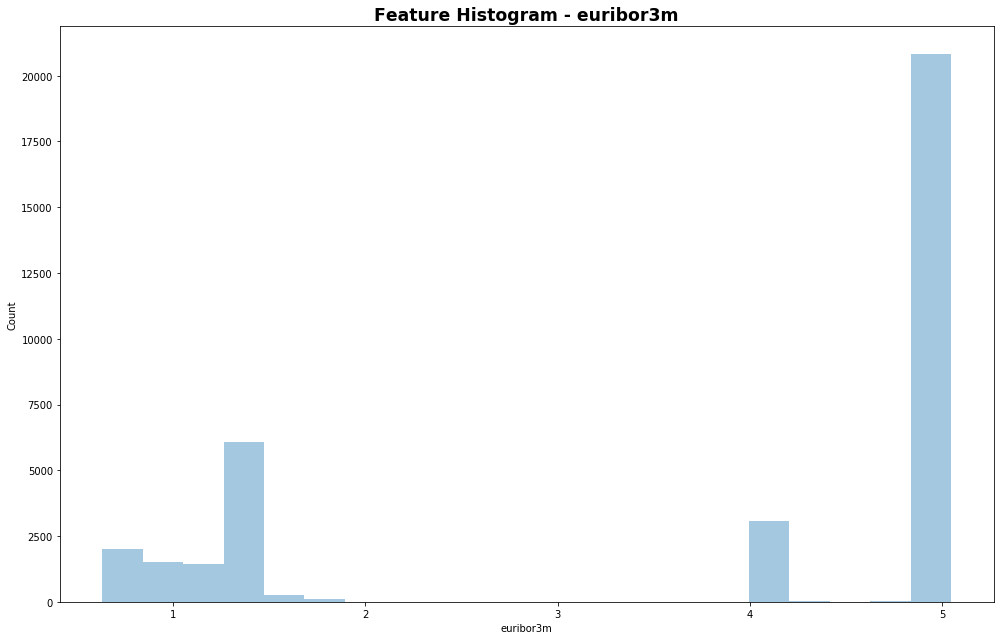

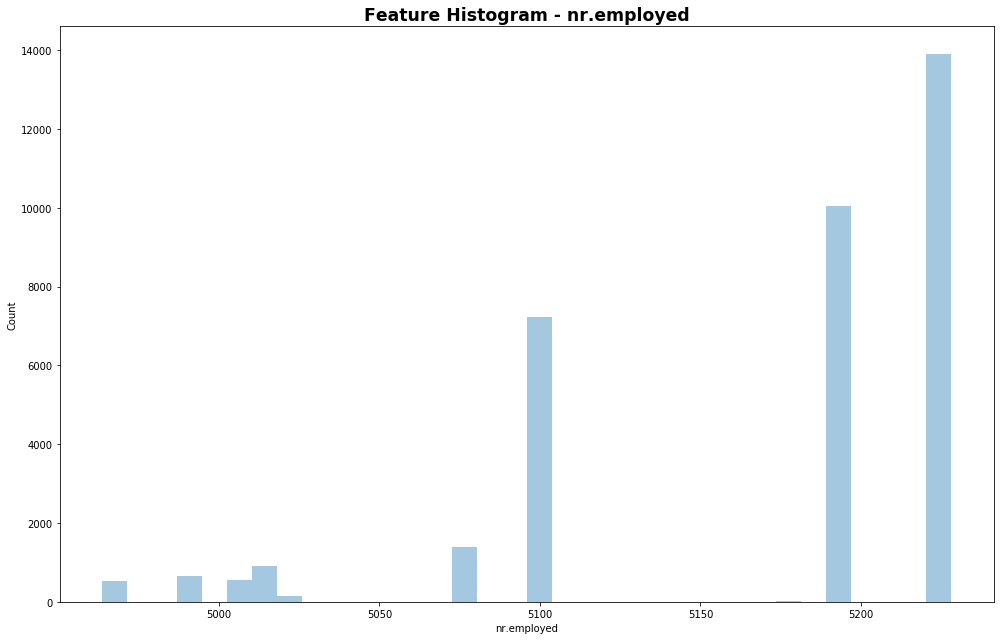

In [38]:
num_features = list(df.select_dtypes(exclude="object").columns)
for feature in num_features:
#devide for economic 
    plt.figure(figsize=(14, 9))
    sns.distplot(df[feature].dropna(),kde=False)
    plt.title("Feature Histogram - " + feature,fontsize='xx-large', fontweight='bold')
    plt.ylabel("Count")
    plt.xlabel(feature)
    plt.tight_layout()

<h3>2.4. Categorial manipulations:<h3>

<h4>2.4.1 change "yes" or "no" to 1 or 0<h4>

In [39]:
df['y'] = df.y.map(dict(yes=1, no=0))

<h4>2.4.2 Convert the month list to 4 binary quarters column <h4>

In [40]:
months=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'];
Q = [1,1,1,1,2,2,2,3,3,3,4,4,4];month_dic=dict(zip(months,Q))
df['month']=df.month.replace(month_dic)
df=pd.get_dummies(df, columns=['month'],prefix='Q')

<h4>2.4.3. convert categorial features to numeric and drop the number of variables<h4>

In [41]:
#education
df['education']=df.education.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic')
#for education it makes sense to use ranking
education_dic={'illiterate': 0,'basic' : 1,'high.school' : 2,'professional.course' : 3,'university.degree' : 4}
df['education']=df.education.replace(education_dic)
#job
df.job.replace(['admin.', 'management'], 'administration_management', inplace=True)
df.loc[(df['age'] > 60 ) & (df['job'] == 'administration_management' ) , 'job'] = 'retired'
df.job.replace(['retired', 'unemployed'], 'no_active_income', inplace=True)
df.job.replace('housemaid', 'services')
df['job']=df.job.replace('entrepreneur', 'self-employed')
# Convert other Series from yes or no to binary
df['housing'] = df.housing.map(dict(yes=1, no=0));
df['loan'] = df.loan.map(dict(yes=1, no=0));
df=df.rename(columns = {'contact':'contact_by_cellular'})
df['contact_by_cellular'] = df.contact_by_cellular.map(dict(cellular = 1, telephone = 0))

### <h2>3. Missing Values<h2>

In [42]:
print("3.1. Total NaN rows = " + str(sum(df.isna().sum())))


3.1. Total NaN rows = 11190


 Present NaN % in each feature. 

In [43]:
(100*df.isna().sum()/df.shape[0]).round(1)

age                     0.4
job                     0.0
marital                 0.2
education               4.2
default                20.9
housing                 2.4
loan                    2.4
contact_by_cellular     0.0
day_of_week             0.0
duration                0.0
campaign                1.2
pdays                   0.0
previous                0.0
poutcome                0.0
emp.var.rate            0.0
cons.price.idx          0.0
cons.conf.idx           0.0
euribor3m               0.0
nr.employed             0.0
y                       0.0
Q_1                     0.0
Q_2                     0.0
Q_3                     0.0
Q_4                     0.0
dtype: float64

In [44]:
#we need to see how values are distributed:
#first, we convert unknown values from NaN so they will be countable as unknown:
df['default'] = df.default.replace(np.nan,'unknown',regex=True)
#default
pd.crosstab(df['y'],df['default'],dropna=True).apply(lambda r: r/r.sum(), axis=1).round(4)
#most of No are at default, so we cant really learn from it. then, it will be deleted
df=df.drop("default",axis=1)
#loan
df['loan'] = df.loan.replace(np.nan,'unknown',regex=True)
pd.crosstab(df['y'],df['loan']).apply(lambda r: r/r.sum(), axis=1).round(2)
df['loan'] = df['loan'].replace('unknown',0)
#housing
df['housing'] = df.housing.replace(np.nan,'unknown',regex=True)
pd.crosstab(df['y'],df['housing']).apply(lambda r: r/r.sum(), axis=1).round(2)
#values distribute practicly evenly, therefore we can delete uknowns:
df = df[df.housing != "unknown"]

 We think that ‘job’ is influenced 
 by the ‘education’ of a person. because that, 
 we can infer ‘job’ based on the education of the person.
 Moreover, since we are just filling the missing values,
 we are not much concerned about the causal inference.
 We can use the job to predict education.

to infer the missing values in 'job' and 'education', we make use of the cross-tabulation between 'job' and 'education'.


In [45]:
pd.crosstab(df['job'], df['education'], rownames=['job'], colnames=['education'])

education,0.0,1.0,2.0,3.0,4.0
job,,,,,
administration_management,1,896,2974,379,6519
blue-collar,8,6214,746,378,84
housemaid,1,538,149,50,115
no_active_income,3,958,446,324,488
self-employed,3,646,298,254,1185
services,0,633,2238,192,134
student,0,119,306,36,143
technician,0,443,731,2764,1510
unknown,0,89,30,10,37


While imputing the values for job and education, we followed the fact that
the correlations should make real world sense. 

Text(0, 0.5, 'Count')

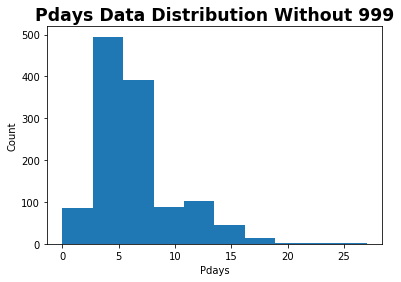

In [46]:
#job
df['job'] = df.job.replace(np.nan,'unknown',regex=True)
df.loc[(df['job']=='unknown') & (df['education']==1), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']==3), 'job'] = 'technician'
#education 
df['education'] = df.education.replace(np.nan,'unknown',regex=True)
df.loc[(df['education']=='unknown') & (df['job']=='administration_management'), 'education'] = 4
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 2
#Impute by mean value for age & campaign
#age
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
df["age"] = imputer.fit_transform(df[['age']])
#campaign
df['campaign'] = imputer.fit_transform(df[['campaign']])
# Examine the missing values in 'pdays'
plt.figure()
plt.hist(df.loc[df.pdays != 999, 'pdays'])
plt.title("Pdays Data Distribution Without 999", fontsize='xx-large', fontweight='bold')
plt.xlabel("Pdays")
plt.ylabel("Count")

two varibale are connected - pdays and poutcome. Lets check their connection -

In [47]:
pd.crosstab(df['pdays'],df['poutcome'], values=df['age'], aggfunc='count')

poutcome,failure,nonexistent,success
pdays,,,
0,NaN,NaN,14.0
1,NaN,NaN,20.0
2,NaN,NaN,51.0
3,3.0,NaN,356.0
4,2.0,NaN,96.0
5,4.0,NaN,34.0
6,22.0,NaN,309.0
7,13.0,NaN,34.0
8,4.0,NaN,10.0


As we can see from the above table, the majority of the values for 'pdays'
are missing. The majority of these missing values occur when the 'poutcome'
is 'non-existent'. This means that the majority of the values in 'pdays'
are missing because the customer was never contacted before. To deal with 
this variable, we removed the numerical variable 'pdays' and replaced it
with categorical variables with following categories: p_days_missing, 
pdays_less_5, pdays_bet_5_15, and pdays_greater_15.

Add new categorical variables to our dataframe.

In [48]:
df['pdays_missing'] = 0;
df['pdays_less_5'] = 0;
df['pdays_greater_15'] = 0;
df['pdays_bet_5_15'] = 0;
df['pdays_missing'][df['pdays']==999] = 1;
df['pdays_less_5'][df['pdays']<5] = 1;
df['pdays_greater_15'][(df['pdays']>15) & (df['pdays']<999)] = 1;
df['pdays_bet_5_15'][(df['pdays']>=5)&(df['pdays']<=15)]= 1;
df= df.drop(['pdays','pdays_less_5'], axis=1);

C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\sit

Since we have many categorical variables, dummy variables needs to be created for those vaiables.

In [49]:
#convert categorical variables to dummy
df = pd.get_dummies(df , columns = ['job', 'marital' ,'day_of_week', 'poutcome'])

In [50]:
df = df[df != "unknown"]
print("we remove all other NaNs")
df = df.dropna()

we remove all other NaNs


In [51]:
print("Number of deleted rows = " + str(df_copy_original.shape[0]-df.shape[0]))

Number of deleted rows = 1857


In [52]:
print("only "+ str(round(100*(df_copy_original.shape[0]-df.shape[0])/df.shape[0],1))+" %")

only 5.5 %


In [53]:
print("Finally, the total NaN rows = " + str(sum(df.isna().sum())))

Finally, the total NaN rows = 0


#### Q4

Delete Q4 in order to avoid dummy variable trap.

#### duration

The variable “duration” will need to be dropped before we start building a predictive model
because it highly affects the output target (e.g., if duration=0 then y=”no”). 

Yet, the duration is not known before a call is performed.

In [54]:
df=df.drop(["duration","Q_4"],axis=1)

<h3>2.5. correlation heat map<h2>

Text(0.5, 1, 'Correlation Matrix')

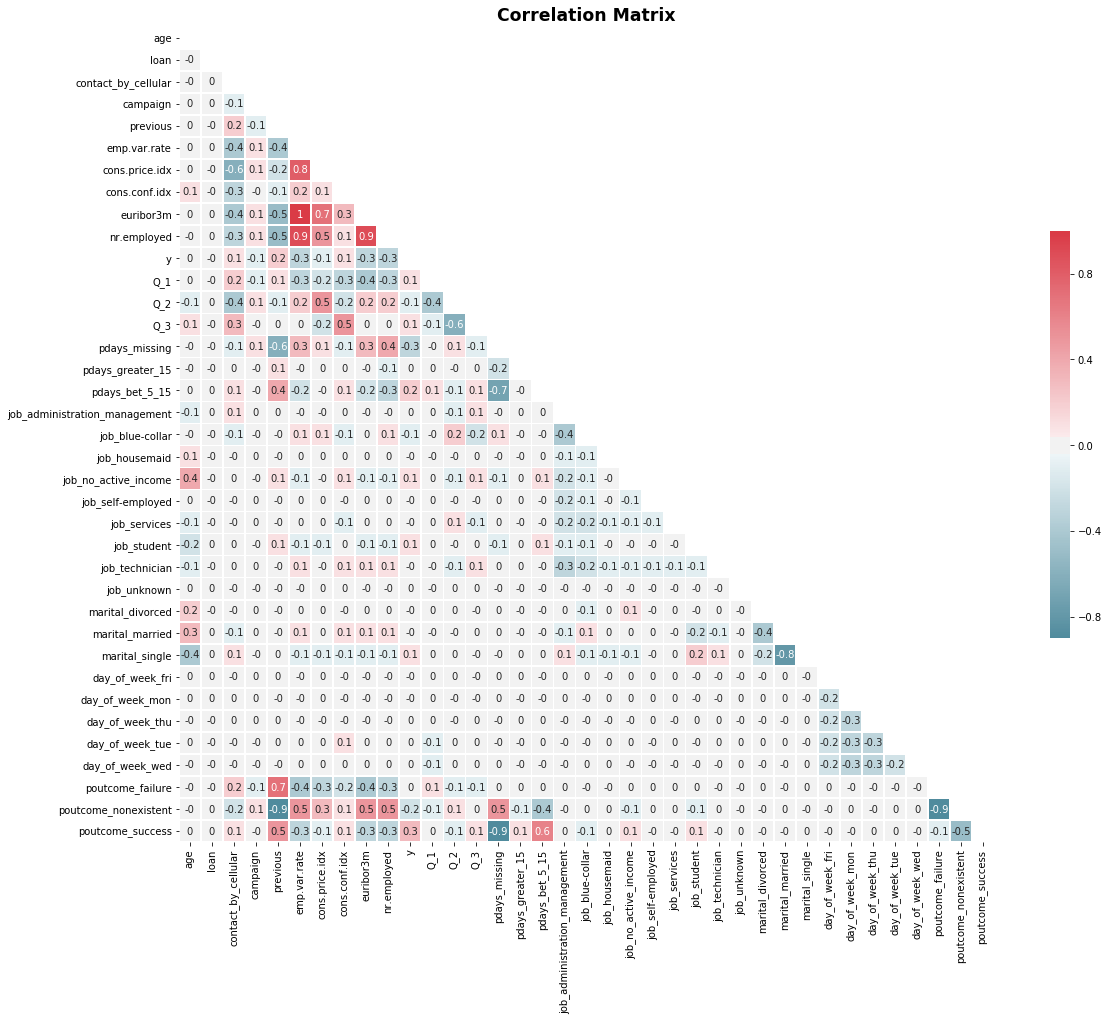

In [55]:
cor = df.corr().round(1)
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(20, 15))
heatmap=sns.heatmap(cor,mask=mask,annot=True,annot_kws={"size": 10},
                    center=0,cmap=cmap,square=True, linewidths=.5,
                    cbar_kws={"shrink": .5},yticklabels=1,xticklabels=1)
plt.title("Correlation Matrix", fontsize='xx-large', fontweight='bold')

we can see from heatmap that the highest correlate features (abs(0.9) and above)
the features the economic features: **["nr.employes"-"emp.var.rate"],["cons.price.idx"-"emp.var.rate"]
["euribor3m"-"emp.var.rate"],["nr.employes"-"euribor3m"],["poutcome_nonexsist-previous"],["poutcome_nonexsist-poutcome_failure"]**
nr.employed and emp.var.rate are  *highly  corelated* and also nr.employed
and euribor3m are highly  corelated.  
because that we will remove emp.var.rate and euribor3m

In [56]:
#Delete the features above at 1 command
df=df.drop(["euribor3m","emp.var.rate","poutcome_nonexistent","marital_single","pdays_missing"],axis=1)

In [57]:
df_copy_feature_filtered=df.copy()

Now we want to see the updated correlation matrix

Text(0.5, 1, 'Updated Correlation Matrix')

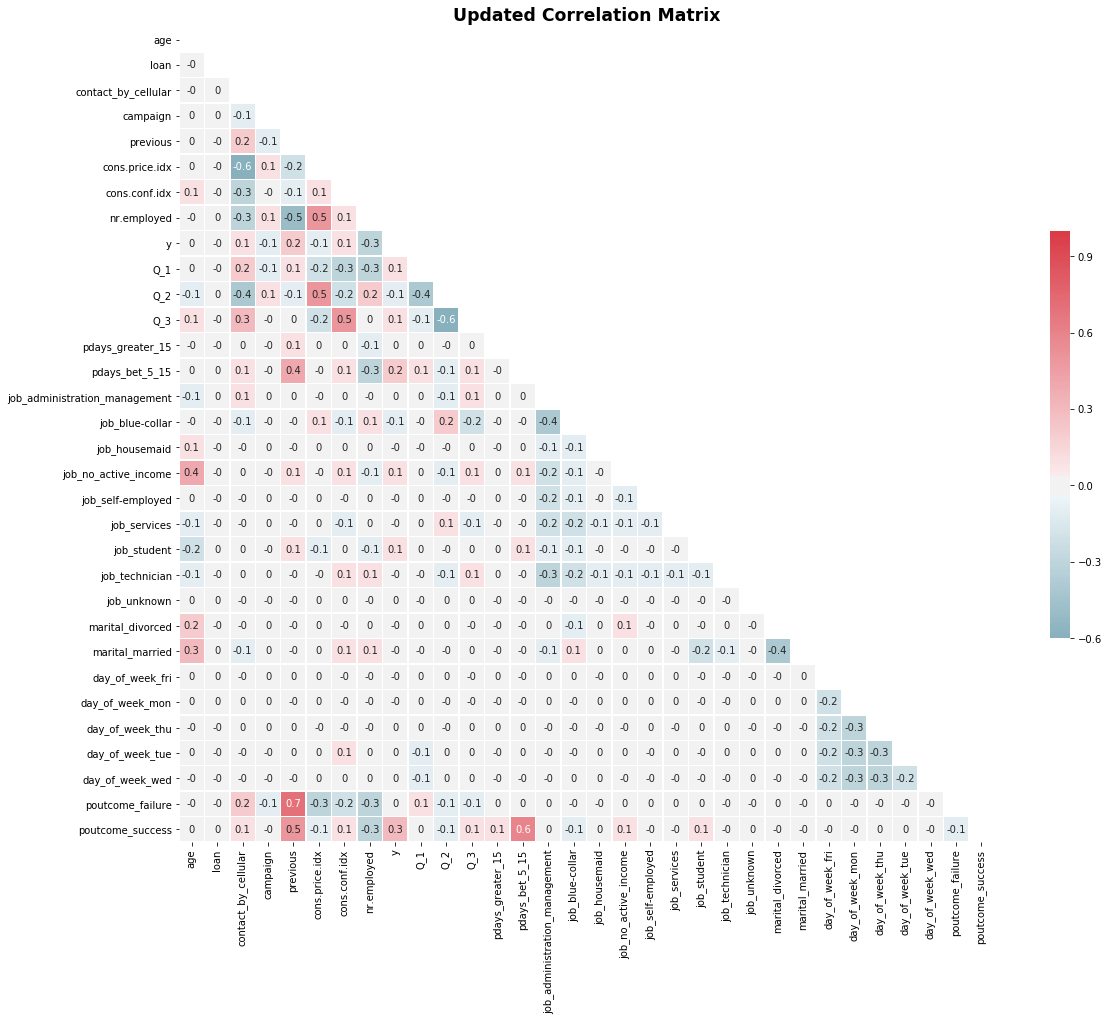

In [58]:
cor = df.corr().round(1)
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(20, 15))
heatmap=sns.heatmap(cor,mask=mask,annot=True,annot_kws={"size": 10},
                    center=0,cmap=cmap,square=True, linewidths=.5,
                    cbar_kws={"shrink": .5},yticklabels=1,xticklabels=1)
plt.title("Updated Correlation Matrix", fontsize='xx-large', fontweight='bold')

<h2>4. Data Normalization<h2>

<h3>4.1. Box Plot <h2>

**Outliers: Outliers are defined as 1.5 x Q3 value (75th percentile).**

In [59]:
feature_lst=["cons.price.idx","nr.employed","cons.conf.idx","age","campaign","previous"]
df_with_outliers=df.copy()

**cons.price.idx**

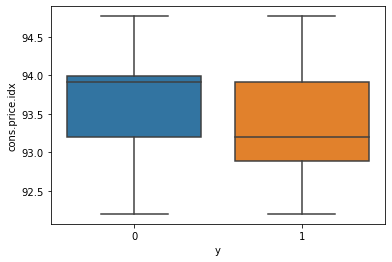

In [60]:
sns.boxplot(x='y', y="cons.price.idx", data=df_with_outliers)

There are no outliers for this feature.

**nr.employed**

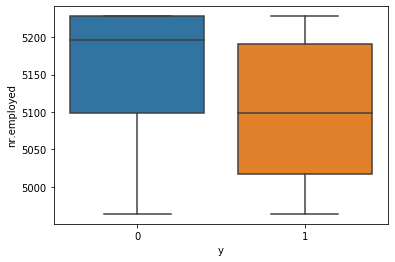

In [61]:
sns.boxplot(x='y', y="nr.employed", data=df_with_outliers)

There are no outliers for this feature.

**cons.conf.idx**

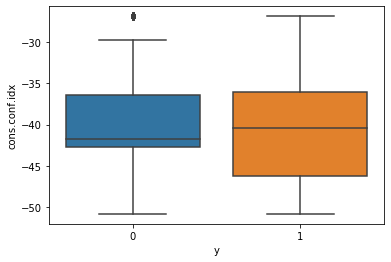

In [62]:
sns.boxplot(x='y', y="cons.conf.idx", data=df_with_outliers)

There are some unusual results in the target variable "no", but these do not significantly exceed the upper limit. 

Then, they fit the upper bound of the target variable "yes". 

Therefore, we chose to leave it.

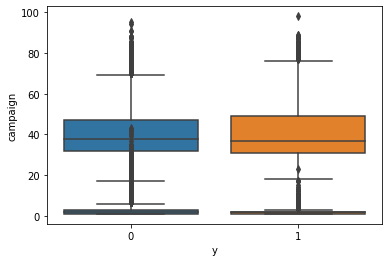

In [63]:
sns.boxplot(x='y', y="age", data=df_with_outliers)
sns.boxplot(x='y', y="campaign", data=df_with_outliers)

We have outliers as max('age') and max('campaign') > 1.5Q3('age') and >1.5Q3('campaign') respectively.

But we also see that the value of these outliers are not so unrealistic (max('age')=98 and max('campaign')=56).

Hence, we need not remove them since the prediction model should represent the real world. 

This improves the generalizability of the model and makes it robust for real world situations. 

The outliers, therefore, are not removed.

**"previous"**

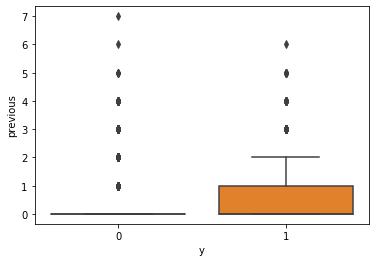

In [64]:
sns.boxplot(x='y', y="previous", data=df_with_outliers)

This variable has many unusual results, from the database, The unusual results belong to many calls made to a customer and therefore the outlierresults are much higher.

We decided to sift the top results that exceed 3 times the upper limit, leaving the other results less than the top limit.
we will do it at 5.3.

In [65]:
df_outliers=df_with_outliers[["previous"]]

<h3>4.2. Normalize features <h2>

In [66]:
from sklearn.preprocessing import MinMaxScaler   
numeric_df = df.select_dtypes(exclude="object")
scaler = MinMaxScaler()
normalized_df_data =scaler.fit_transform(numeric_df.values)
df_scaled=pd.DataFrame(normalized_df_data,columns=numeric_df.columns)

In [67]:
df_scaled

,age,loan,contact_by_cellular,campaign,previous,cons.price.idx,cons.conf.idx,nr.employed,y,Q_1,...,job_unknown,marital_divorced,marital_married,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_success
0,0.271605,0.0,1.0,0.047619,0.000000,0.669135,0.338912,1.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.419753,0.0,0.0,0.214286,0.000000,0.882307,0.376569,1.000000,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.419753,1.0,0.0,0.000000,0.000000,0.882307,0.376569,1.000000,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.444444,0.0,0.0,0.023810,0.000000,0.698753,0.602510,0.859735,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.283951,0.0,1.0,0.000000,0.142857,0.269680,0.192469,0.512287,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,0.419753,0.0,0.0,0.023810,0.000000,0.698753,0.602510,0.859735,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.308642,0.0,0.0,0.000000,0.000000,0.882307,0.376569,1.000000,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.432099,0.0,1.0,0.047619,0.000000,0.269680,0.192469,0.512287,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.283951,0.0,1.0,0.023810,0.000000,0.669135,0.338912,1.000000,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.506173,0.0,0.0,0.000000,0.000000,0.882307,0.376569,1.000000,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2>5. Outlier Detection <h2>

<h3>5.1. Clustrering by DBSCAN <h3>

*The optimal value for epsilon will be found at the point of maximum curvature.*

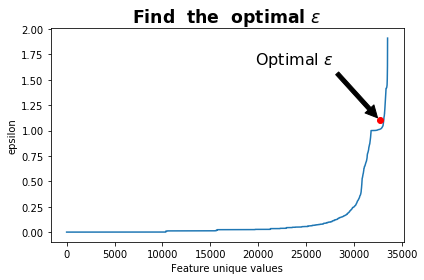

In [68]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title("Find  the  optimal "+r'$  \varepsilon$',fontsize='xx-large', fontweight='bold')
plt.ylabel("epsilon")
plt.xlabel("Feature unique values")
plt.plot([32710], [1.1], 'ro')
plt.annotate('Optimal '+r'$\varepsilon$', (32710,1.1),
            xytext=(0.8, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16,
            horizontalalignment='right', verticalalignment='top')
plt.tight_layout()

eps = the best epsilon is at the "elbow" of NearestNeighbors graph

In [86]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1.1,min_samples=5).fit(df_scaled)
labels=db.labels_
clusterNum=len(set(labels))
print("number of clusters is "+str(clusterNum))
noise=np.count_nonzero(labels == -1)
noise_percentage=round(100*noise/df_scaled.shape[0],0)
print("Number of outliers is "+str(noise)+ ", Noise accounts for "+str(noise_percentage)+"%  of the total dataset" )

number of clusters is 57
Number of outliers is 730, Noise accounts for 2.0%  of the total dataset


In [87]:
df=df_scaled
df_DBSCAN=df.copy()
df_DBSCAN["cluster_Db"]=labels
df_DBSCAN = df_DBSCAN[df_DBSCAN.cluster_Db != -1]
df_DBSCAN=df_DBSCAN.drop("cluster_Db",axis=1)

<h3>5.2. Multiple Clustrers by DBSCAN <h3>

**Lots of clusters means low number of noise, therefore low number of outliers.**

<h3>5.3. Another method to remove outliers <h3>

In [92]:
from scipy import stats
z = np.abs(stats.zscore(df_outliers))
#define a threshold to identify an outlier
threshold = 3
df_outliers=df_outliers[(z < threshold).all(axis=1)]
Num_outliers_2nd=df_with_outliers.shape[0]-df_outliers.shape[0]
print("number of outliers is "+str(Num_outliers_2nd))

number of outliers is 800


In [95]:
#%%
# Logistic Regression to the Training set include outliers
y = df["y"]
X = df.drop("y",axis=1)

In [99]:
onesYCount = np.count_nonzero(df['y'])
prop_ones_y =  onesYCount/ len(df['y'])
# we can see that the data is unproportional
print (prop_ones_y)

0.11052427416226539


<h2>6. Predictive Model <h2>

C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9010890645979412
0.6768558951965066
0.20833333333333334
Logistic Regression classification report
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      5959
         1.0       0.68      0.21      0.32       744

   micro avg       0.90      0.90      0.90      6703
   macro avg       0.79      0.60      0.63      6703
weighted avg       0.88      0.90      0.88      6703



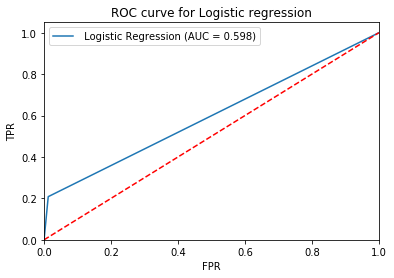

C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.912612475217325
0.71875
0.20833333333333334
Logistic Regression without outliers classification report
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      5914
         1.0       0.72      0.18      0.29       643

   micro avg       0.91      0.91      0.91      6557
   macro avg       0.82      0.59      0.62      6557
weighted avg       0.90      0.91      0.89      6557



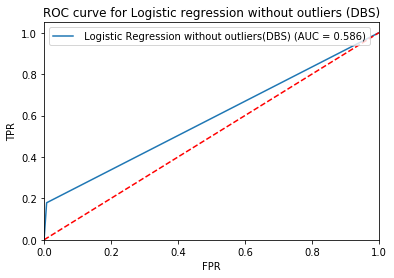

C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


rf has been fitted.


C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


gb has been fitted.
rf 0.874934725848564
gb 0.9033569563595674


C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Randon foresst summary: 
                precision    recall  f1-score   support

         0.0       0.92      0.95      0.93      5959
         1.0       0.43      0.31      0.36       744

   micro avg       0.88      0.88      0.88      6703
   macro avg       0.68      0.63      0.65      6703
weighted avg       0.86      0.88      0.87      6703

Randon foresst auc :  0.6309944793003084
Gradient BoostingC summary: 
                precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      5959
         1.0       0.63      0.24      0.35       744

   micro avg       0.90      0.90      0.90      6703
   macro avg       0.77      0.61      0.65      6703
weighted avg       0.88      0.90      0.88      6703

Gradien tBoostingC foresst auc :  0.6125778618047698
1.0    33401
0.0    29809
Name: y, dtype: int64
[0. 1.]


C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


NameError: name 'X_up' is not defined

In [100]:
#%%
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Splitting the dataset without_outliers after dbs into the Training set and Test set)
y_DBS = df_DBSCAN["y"]
X_DBS = df_DBSCAN.drop("y",axis=1)
X_DBS_train, X_DBS_test, y_DBS_train, y_DBS_test = train_test_split(X_DBS, y_DBS, test_size = 0.2, random_state = 0)


In [ ]:

# Fitting Logistic Regression to the Training set include outliers
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
LR_y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
LR_cm= confusion_matrix(y_test, LR_y_pred)
col_names = ['a_0','a_1' ]
index_names = ['p_0','p_1' ]
LR_accuracy = (LR_cm[0][0] + LR_cm[1][1]) /np.sum(LR_cm)
print(LR_accuracy )
LR_precision =  (LR_cm[1][1] /np.sum(LR_cm[: , 1])) #TP/(TP+FN) Predicted 1 and actual 1 /(total actual 1)
print (LR_precision) 
LR_recall = LR_cm[1][1] /np.sum((LR_cm[1 , :])) #TP/(TP+FN)  Predicted 1 and actual 1   / total Predicted 1
print (LR_recall) 
#Creating the LR classification report
from sklearn.metrics import classification_report , roc_auc_score , roc_curve
print ("Logistic Regression classification report")
print(classification_report(y_test, LR_y_pred)) 
#Obtaining the ROC score
LR_roc_auc = roc_auc_score(y_test, LR_y_pred)
#Obtaining false and true positives & thresholds
fpr, tpr, thresholds = roc_curve(y_test, LR_y_pred)
#Plotting the curve
plt.plot(fpr, tpr, label=' Logistic Regression (AUC = %0.03f)' % LR_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
" axis x =TP RATE = FP/ (FP +TN) = by mistake predict as 1/ total 0. low x is good"
" axis y =FP RATE = TP/(TP + FN) = said it 1 and was right /total 1. high y is good."
plt.title('ROC curve for Logistic regression')
plt.legend(loc="upper left")
plt.show()
#%%
# Fitting Logistic Regression to the Training set after DBS
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_DBS_train, y_DBS_train)
# Predicting the Test set results
LR_y_DBS_pred= classifier.predict(X_DBS_test)
# Making the Confusion Matrix
LR_DBS_cm= confusion_matrix(y_DBS_test, LR_y_DBS_pred)
col_names = ['a_0','a_1' ]
index_names = ['p_0','p_1' ]
LR_DBS_accuracy = (LR_DBS_cm[0][0] + LR_DBS_cm[1][1]) /np.sum(LR_DBS_cm)
print(LR_DBS_accuracy )
LR_DBS_precision =  (LR_DBS_cm[1][1] /np.sum(LR_DBS_cm[: , 1])) #TP/(TP+FN) Predicted 1 and actual 1 /(total actual 1)
print (LR_DBS_precision) 
LR_DBS_recall = LR_cm[1][1] /np.sum((LR_cm[1 , :])) #TP/(TP+FN)  Predicted 1 and actual 1   / total Predicted 1
print (LR_DBS_recall) 
#Creating the LR classification report
print ("Logistic Regression without outliers classification report")
print(classification_report(y_DBS_test, LR_y_DBS_pred)) 
#Obtaining the ROC score
LR_DBS_roc_auc = roc_auc_score(y_DBS_test, LR_y_DBS_pred)
#Obtaining false and true positives & thresholds
fpr, tpr, thresholds = roc_curve(y_DBS_test, LR_y_DBS_pred)
#Plotting the curve
plt.plot(fpr, tpr, label=' Logistic Regression without outliers(DBS) (AUC = %0.03f)' % LR_DBS_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
" axis x =TP RATE = FP/ (FP +TN) = by mistake predict as 1/ total 0. low x is good"
" axis y =FP RATE = TP/(TP + FN) = said it 1 and was right /total 1. high y is good."
plt.title('ROC curve for Logistic regression without outliers (DBS)')
plt.legend(loc="upper left")
plt.show()

# we got the best result with the orignial DB, threfore we will use him


In [ ]:
#%%
# Fitting  Regression Tree and GradientBoostin to the Training set
#---------------------------------------------------------------------
#Setting up pipelines with a StandardScaler function to normalize the variables
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier


#Setting up pipelines with a StandardScaler function to normalize the variables
pipelines = {
    'rf' : make_pipeline(StandardScaler(), 
                         RandomForestClassifier(random_state=42, class_weight='balanced')),
    'gb' : make_pipeline(StandardScaler(), 
                         GradientBoostingClassifier(random_state=42))
}

#Setting up the "rule of thumb" hyperparameters for the Random Forest
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33]
}

#Setting up the "rule of thumb" hyperparameters for the Gradient Boost
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

#Creating the dictionary of hyperparameters
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

#Creating an empty dictionary for fitted models
fitted_alternative_models = {}

# Looping through model pipelines, tuning each with GridSearchCV and saving it to fitted_logreg_models
for name, pipeline in pipelines.items():
    #Creating cross-validation object from pipeline and hyperparameters
    alt_model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    #Fitting the model on X_train, y_train
    alt_model.fit(X_train, y_train)
    
    #Storing the model in fitted_logreg_models[name] 
    fitted_alternative_models[name] = alt_model
    
    #Printing the status of the fitting
    print(name, 'has been fitted.')

for name, model in fitted_alternative_models.items():
    print(name, model.best_score_ )    
    
RF_y_pred= fitted_alternative_models['rf'].predict(X_test)
print("Randon foresst summary: \n " ,  classification_report(y_test, RF_y_pred))
RF_roc_auc = roc_auc_score(y_test, RF_y_pred)
print("Randon foresst auc : " ,  RF_roc_auc )
  
GB_y_pred= fitted_alternative_models['gb'].predict(X_test)
print("Gradient BoostingC summary: \n " ,  classification_report(y_test, GB_y_pred))
GB_roc_auc = roc_auc_score(y_test, GB_y_pred)
print("Gradien tBoostingC foresst auc : " ,  GB_roc_auc )



1.0    33401
0.0    29809
Name: y, dtype: int64
[0. 1.]


C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.711438063597532
0.7751129648939868
0.6545347813325506
              precision    recall  f1-score   support

         0.0       0.66      0.78      0.71      5828
         1.0       0.78      0.65      0.71      6814

   micro avg       0.71      0.71      0.71     12642
   macro avg       0.72      0.72      0.71     12642
weighted avg       0.72      0.71      0.71     12642



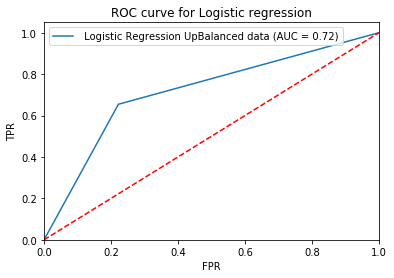

0.7803468208092486
0.7830882352941176
0.5867768595041323
              precision    recall  f1-score   support

         0.0       0.78      0.90      0.84      1177
         1.0       0.78      0.59      0.67       726

   micro avg       0.78      0.78      0.78      1903
   macro avg       0.78      0.74      0.75      1903
weighted avg       0.78      0.78      0.77      1903



C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:108: MatplotlibDeprecationWarning: Unrecognized location 'uper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


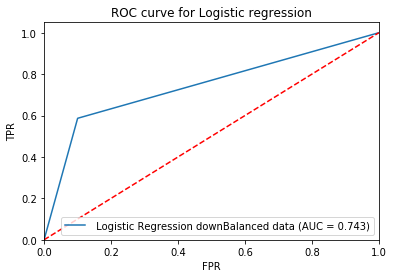

0.6361335231767126
0.6671700392630625
0.6483710008805401
              precision    recall  f1-score   support

         0.0       0.60      0.62      0.61      5828
         1.0       0.67      0.65      0.66      6814

   micro avg       0.64      0.64      0.64     12642
   macro avg       0.63      0.64      0.63     12642
weighted avg       0.64      0.64      0.64     12642



C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


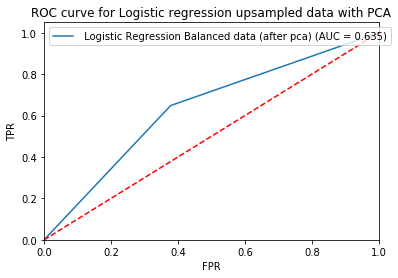

C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


rf has been fitted.


C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


gb has been fitted.
rf 0.9451233981964879
gb 0.8027606391393767


C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Randon foresst summary: 
                precision    recall  f1-score   support

         0.0       0.99      0.89      0.94      5828
         1.0       0.91      1.00      0.95      6814

   micro avg       0.95      0.95      0.95     12642
   macro avg       0.95      0.94      0.95     12642
weighted avg       0.95      0.95      0.95     12642

Randon foresst auc :  0.9438835755204624
Gradient BoostingC summary: 
                precision    recall  f1-score   support

         0.0       0.74      0.85      0.79      5828
         1.0       0.85      0.75      0.80      6814

   micro avg       0.80      0.80      0.80     12642
   macro avg       0.80      0.80      0.80     12642
weighted avg       0.80      0.80      0.80     12642

Gradien tBoostingC foresst auc :  0.7988888847479624


C:\Users\ophirs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [102]:
#Upsampling the  data 
#Separating the imbalanced observations into 2 separate datasets
from sklearn.utils import resample
df_majority = df[df['y']==0]
df_minority = df[df['y']==1]
df_majority = pd.DataFrame(df_majority)
df_minority = pd.DataFrame(df_minority)
#Upsampling the minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=33401, random_state=42)
#Concatenating two datasets
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
#New class counts
print(df_upsampled['y'].value_counts())
print(df_upsampled['y'].unique())
#%%    
#Down sampling the  data 
from sklearn.utils import resample
np.random.seed(0)
df_zero_index = df.index[df['y'] == 0].tolist()
df_majority_dowmsampled_index = np.random.choice(df_zero_index, 24000, replace=False)
df_downsampled = df.drop(df_majority_dowmsampled_index)
df_downsampled['y'].value_counts()
   
#%%"
#we will check the best method for our model, logistic regression , on the upsampled and the downsampled data
#try logistic regression om the upbalanced data

y_up = df_upsampled["y"]
X_up = df_upsampled.drop("y",axis=1)

X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up, y_up, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_up, y_train_up)
# Predicting the Test set results
LR_y_pred_up = classifier.predict(X_test_up)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
LR_cm_up= confusion_matrix(y_test_up, LR_y_pred_up)
col_names = ['a_0','a_1' ]
index_names = ['p_0','p_1' ]
LR_accuracy_up = (LR_cm_up[0][0] + LR_cm_up[1][1]) /np.sum(LR_cm_up)
print(LR_accuracy_up )
LR_precision_up =  (LR_cm_up[1][1] /np.sum(LR_cm_up[: , 1])) #TP/(TP+FN) Predicted 1 and actual 1 /(total actual 1)
print (LR_precision_up) 
LR_recall_up = LR_cm_up[1][1] /np.sum((LR_cm_up[1 , :])) #TP/(TP+FN)  Predicted 1 and actual 1   / total Predicted 1
print (LR_recall_up) 
#Creating the LR classification report
from sklearn.metrics import classification_report , roc_auc_score , roc_curve
print(classification_report(y_test_up, LR_y_pred_up)) 
#Obtaining the ROC score
roc_auc_up = roc_auc_score(y_test_up , LR_y_pred_up)
#Obtaining false and true positives & thresholds
fpr, tpr, thresholds = roc_curve(y_test_up, LR_y_pred_up)
#Plotting the curve
plt.plot(fpr, tpr, label=' Logistic Regression UpBalanced data (AUC = %0.02f)' % roc_auc_up)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
" axis x =TP RATE = FP/ (FP +TN) = by mistake predict as 1/ total 0. low x is good"
" axis y =FP RATE = TP/(TP + FN) = said it 1 and was right /total 1. high y is good."
plt.title('ROC curve for Logistic regression')
plt.legend(loc="upper left")
plt.show()
LR_cm_up= pd.DataFrame(LR_cm_up, index=col_names, columns=index_names)
#%%
#try logistic regression om the downbalanced data

y_down = df_downsampled["y"]
X_down = df_downsampled.drop("y",axis=1)

X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(X_down, y_down, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_down, y_train_down)
# Predicting the Test set results
LR_y_pred_down = classifier.predict(X_test_down)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
LR_cm_down= confusion_matrix(y_test_down, LR_y_pred_down)
col_names = ['a_0','a_1' ]
index_names = ['p_0','p_1' ]
LR_accuracy_down = (LR_cm_down[0][0] + LR_cm_down[1][1]) /np.sum(LR_cm_down)
print(LR_accuracy_down )
LR_precision_down =  (LR_cm_down[1][1] /np.sum(LR_cm_down[: , 1])) #TP/(TP+FN) Predicted 1 and actual 1 /(total actual 1)
print (LR_precision_down) 
LR_recall_down = LR_cm_down[1][1] /np.sum((LR_cm_down[1 , :])) #TP/(TP+FN)  Predicted 1 and actual 1   / total Predicted 1
print (LR_recall_down) 
#Creating the LR classification report
from sklearn.metrics import classification_report , roc_auc_score , roc_curve
print(classification_report(y_test_down, LR_y_pred_down)) 
#Obtaining the ROC score
roc_auc_down = roc_auc_score(y_test_down , LR_y_pred_down)
#Obtaining false and true positives & thresholds
fpr, tpr, thresholds = roc_curve(y_test_down, LR_y_pred_down)
#Plotting the curve
plt.plot(fpr, tpr, label=' Logistic Regression downBalanced data (AUC = %0.03f)' % roc_auc_down)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
" axis x =TP RATE = FP/ (FP +TN) = by mistake predict as 1/ total 0. low x is good"
" axis y =FP RATE = TP/(TP + FN) = said it 1 and was right /total 1. high y is good."
plt.title('ROC curve for Logistic regression')
plt.legend(loc="uper left")
plt.show()
LR_cm_down= pd.DataFrame(LR_cm_down, index=col_names, columns=index_names)
#the best results was on the upsampled data
#%%
#trying pca on the balanced logistic regression
from sklearn.decomposition import PCA
X_train_up_pca, X_test_up_pca, y_train_up_pca, y_test_up_pca = train_test_split(X_up, y_up, test_size = 0.2, random_state = 0)
pca_up= PCA()
X_train_up_pca = pca_up.fit_transform(X_train_up_pca)
X_test_up_pca = pca_up.transform(X_test_up_pca)
explained_variance_pca_up =pca_up.explained_variance_ratio_
#we will choose  vars with variance more than 0.1
X_train_up_pca, X_test_up_pca, y_train_up_pca, y_test_up_pca = train_test_split(X_up, y_up, test_size = 0.2, random_state = 0)
pca_up = PCA(2)
X_train_up_pca = pca_up.fit_transform(X_train_up_pca)
X_test_up_pca = pca_up.transform(X_test_up_pca)
explained_variance_pca_up =pca_up.explained_variance_ratio_
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_up_pca, y_train_up_pca)
# Predicting the Test set results
LR_y_pred_up_pca = classifier.predict(X_test_up_pca)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
LR_cm_up_pca= confusion_matrix(y_test_up_pca, LR_y_pred_up_pca)
col_names = ['a_0','a_1' ]
index_names = ['p_0','p_1' ]
LR_accuracy_up_pca = (LR_cm_up_pca[0][0] + LR_cm_up_pca[1][1]) /np.sum(LR_cm_up_pca)
print(LR_accuracy_up_pca )
LR_precision_up_pca =  (LR_cm_up_pca[1][1] /np.sum(LR_cm_up_pca[: , 1])) #TP/(TP+FN) Predicted 1 and actual 1 /(total actual 1)
print (LR_precision_up_pca) 
LR_recall_up_pca = LR_cm_up_pca[1][1] /np.sum((LR_cm_up_pca[1 , :])) #TP/(TP+FN)  Predicted 1 and actual 1   / total Predicted 1
print (LR_recall_up_pca) 
#Creating the LR classification report
from sklearn.metrics import classification_report , roc_auc_score , roc_curve
print(classification_report(y_test_up_pca, LR_y_pred_up_pca)) 
#Obtaining the ROC score
roc_auc_up_pca = roc_auc_score(y_test_up_pca , LR_y_pred_up_pca)
#Obtaining false and true positives & thresholds
fpr, tpr, thresholds = roc_curve(y_test_up_pca, LR_y_pred_up_pca)
#Plotting the curve
plt.plot(fpr, tpr, label=' Logistic Regression Balanced data (after pca) (AUC = %0.03f)' % roc_auc_up_pca)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
" axis x =TP RATE = FP/ (FP +TN) = by mistake predict as 1/ total 0. low x is good"
" axis y =FP RATE = TP/(TP + FN) = said it 1 and was right /total 1. high y is good."
plt.title('ROC curve for Logistic regression upsampled data with PCA')
plt.legend(loc="upper left")
plt.show()
LR_cm_up_pca= pd.DataFrame(LR_cm_up_pca, index=col_names, columns=index_names) 
#%%
# Fitting  Regression Tree and GradientBoostin to the upsampled data
#---------------------------------------------------------------------

#Setting up pipelines with a StandardScaler function to normalize the variables
pipelines = {
    'rf' : make_pipeline(StandardScaler(), 
                         RandomForestClassifier(random_state=42, class_weight='balanced')),
    'gb' : make_pipeline(StandardScaler(), 
                         GradientBoostingClassifier(random_state=42))
}

#Setting up the "rule of thumb" hyperparameters for the Random Forest
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33]
}

#Setting up the "rule of thumb" hyperparameters for the Gradient Boost
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

#Creating the dictionary of hyperparameters
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

#Creating an empty dictionary for fitted models
up_fitted_alternative_models = {}

# Looping through model pipelines, tuning each with GridSearchCV and saving it to fitted_logreg_models
for name, pipeline in pipelines.items():
    #Creating cross-validation object from pipeline and hyperparameters
    alt_model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    #Fitting the model on X_train, y_train
    alt_model.fit(X_train_up, y_train_up)
    
    #Storing the model in fitted_logreg_models[name] 
    up_fitted_alternative_models[name] = alt_model
    
    #Printing the status of the fitting
    print(name, 'has been fitted.')

for name, model in up_fitted_alternative_models.items():
    print(name, model.best_score_ )    
    

    
RF_y_pred_up= up_fitted_alternative_models['rf'].predict(X_test_up)
print("Randon foresst summary: \n " ,  classification_report(y_test_up, RF_y_pred_up))
RF_roc_auc_up = roc_auc_score(y_test_up, RF_y_pred_up)
print("Randon foresst auc : " ,  RF_roc_auc_up )
  
GB_y_pred_up= up_fitted_alternative_models['gb'].predict(X_test_up)
print("Gradient BoostingC summary: \n " ,  classification_report(y_test_up, GB_y_pred_up))
GB_roc_auc_up = roc_auc_score(y_test_up, GB_y_pred_up)
print("Gradien tBoostingC foresst auc : " ,  GB_roc_auc_up )
